In [ ]:
!pip install tensorflow

<h2 style='color:purple' align='center'>Section 1: Build our first neural network in Scikit Learn for Logistic_Reg.csv data</h2>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [3]:
import pandas as pd
mydata = pd.read_csv("/content/Logistic_Reg.csv")
mydata.head()

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome
0,6.2,9.3,7.4,1
1,2.6,2.2,8.7,1
2,9.5,1.5,8.2,1
3,2.6,5.0,0.4,0
4,10.0,7.7,7.2,1


In [4]:
x = mydata.drop("Outcome", axis=1)
y = mydata.Outcome
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [5]:
mymodel = MLPClassifier(solver = 'lbfgs' , alpha= 1e-5, hidden_layer_sizes= (2), random_state= 100)
mymodel.fit(x_train , y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=2, random_state=100,
              solver='lbfgs')

In [6]:
mymodel.score(x_train , y_train)

0.9693877551020408

In [7]:
mymodel.predict_proba(x_train)

array([[6.55060235e-07, 9.99999345e-01],
       [1.09580282e-04, 9.99890420e-01],
       [6.55060235e-07, 9.99999345e-01],
       ...,
       [5.69817529e-03, 9.94301825e-01],
       [6.55060235e-07, 9.99999345e-01],
       [5.28281166e-01, 4.71718834e-01]])

In [8]:
predtest = mymodel.predict(x_test)
mytable = pd.crosstab(y_test , predtest)

In [9]:
mytable

col_0,0,1
Outcome,,
0,54,4
1,0,138


<h3 style='color:blue' align='center'>Section 2: Implementation of activation functions in python</h3>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
def do_plot(x, y, title):
    plt.figure(figsize=(10,5))
    plt.plot(x,y)
    plt.title(title)
    plt.ylabel('Y axis')
    plt.xlabel('X axis')
    plt.show()

In [ ]:
x = tf.Variable(tf.range(-10, 10, 0.1), dtype=tf.float32)
x

<tf.Variable 'Variable:0' shape=(200,) dtype=float32, numpy=
array([-1.00000000e+01, -9.89999962e+00, -9.79999924e+00, -9.69999886e+00,
       -9.59999847e+00, -9.49999809e+00, -9.39999771e+00, -9.29999733e+00,
       -9.19999695e+00, -9.09999657e+00, -8.99999619e+00, -8.89999580e+00,
       -8.79999542e+00, -8.69999504e+00, -8.59999466e+00, -8.49999428e+00,
       -8.39999390e+00, -8.29999352e+00, -8.19999313e+00, -8.09999275e+00,
       -7.99999285e+00, -7.89999294e+00, -7.79999304e+00, -7.69999313e+00,
       -7.59999323e+00, -7.49999332e+00, -7.39999342e+00, -7.29999352e+00,
       -7.19999361e+00, -7.09999371e+00, -6.99999380e+00, -6.89999390e+00,
       -6.79999399e+00, -6.69999409e+00, -6.59999418e+00, -6.49999428e+00,
       -6.39999437e+00, -6.29999447e+00, -6.19999456e+00, -6.09999466e+00,
       -5.99999475e+00, -5.89999485e+00, -5.79999495e+00, -5.69999504e+00,
       -5.59999514e+00, -5.49999523e+00, -5.39999533e+00, -5.29999542e+00,
       -5.19999552e+00, -5.09999561e+00

**Linear Activation**

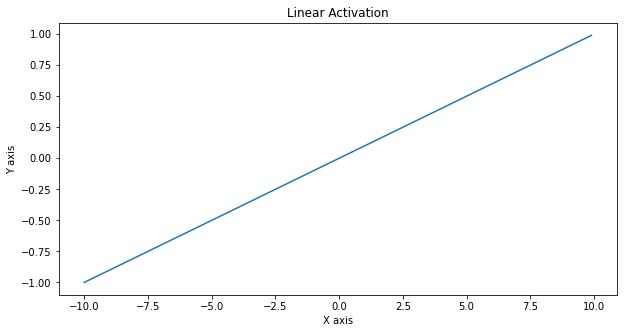

In [ ]:
#Linear Activation
def linear_activation(x):
    c = 0.1
    return c*x.numpy()
do_plot(x.numpy(), linear_activation(x), 'Linear Activation')

<h3 style='color:purple'>Sigmoid</h3>

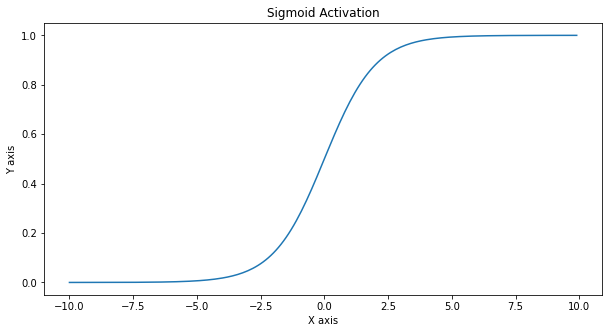

In [ ]:
y = tf.nn.sigmoid(x)
do_plot(x.numpy(), y.numpy(), 'Sigmoid Activation')

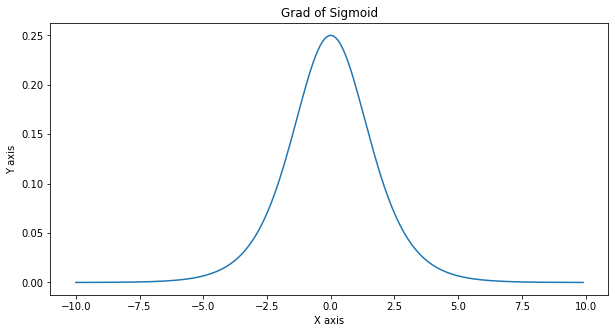

In [ ]:
with tf.GradientTape() as t:
    y = tf.nn.sigmoid(x)
do_plot(x.numpy(), t.gradient(y, x).numpy(), 'Grad of Sigmoid')

<h3 style='color:purple'>tanh</h3>

In [ ]:
import math
def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [ ]:
tanh(-56)

-1.0

In [ ]:
tanh(86)

1.0

In [ ]:
tanh(.66)

0.5783634130445058

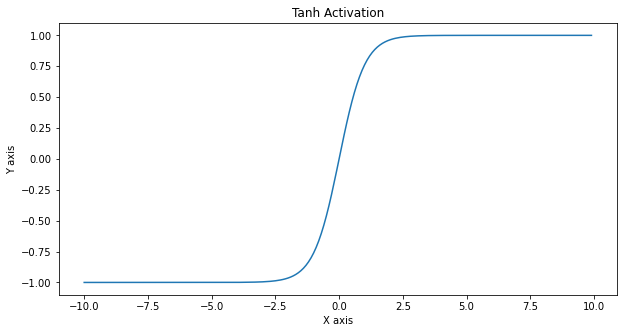

In [ ]:
y = tf.nn.tanh(x)
do_plot(x.numpy(), y.numpy(), 'Tanh Activation')

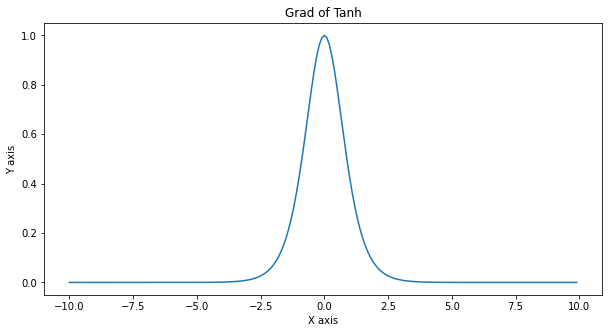

In [ ]:
with tf.GradientTape() as t:
    y = tf.nn.tanh(x)
do_plot(x.numpy(), t.gradient(y, x).numpy(), 'Grad of Tanh')

<h3 style='color:purple'>ReLU</h3>

In [ ]:
def relu(x):
    return max(0,x)

In [ ]:
relu(-100)

0

In [ ]:
relu(10)

10

In [ ]:
relu(0.5)

0.5

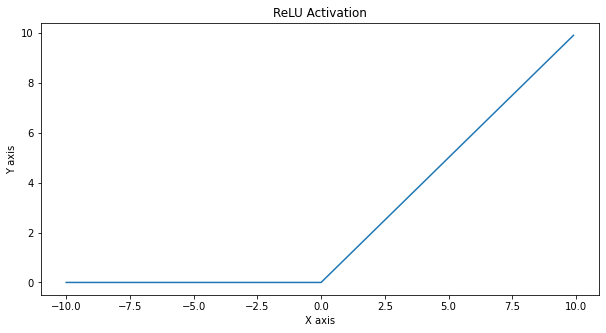

In [ ]:
y = tf.nn.relu(x)
do_plot(x.numpy(), y.numpy(), 'ReLU Activation')

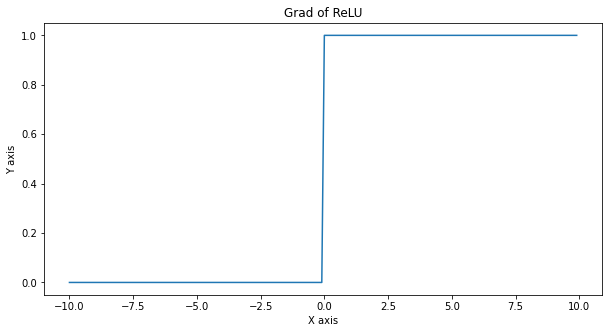

In [ ]:
with tf.GradientTape() as t:
    y = tf.nn.relu(x)
do_plot(x.numpy(), t.gradient(y, x).numpy(), 'Grad of ReLU')

Softmax 

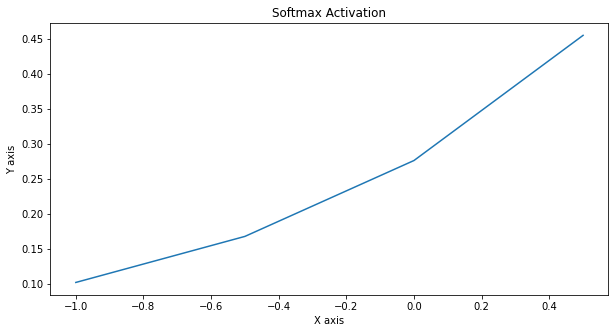

In [ ]:
x1 = tf.Variable(tf.range(-1, 1, .5), dtype=tf.float32)
y = tf.nn.softmax(x1)
do_plot(x1.numpy(), y.numpy(), 'Softmax Activation')

Swish Function

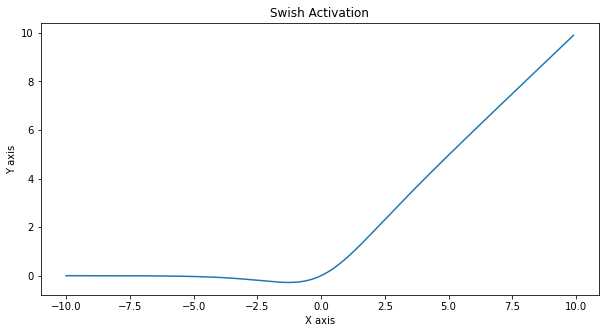

In [ ]:
y = tf.nn.swish(x)
do_plot(x.numpy(), y.numpy(), 'Swish Activation')

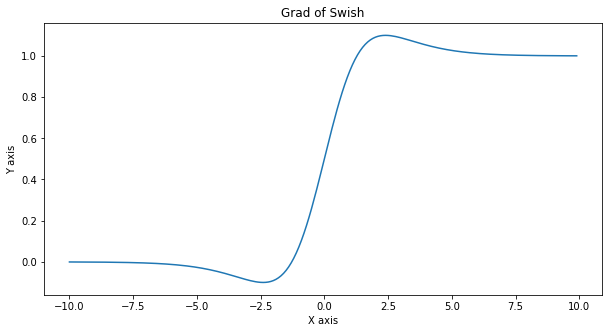

In [ ]:
with tf.GradientTape() as t:
    y = tf.nn.swish(x)
do_plot(x.numpy(), t.gradient(y, x).numpy(), 'Grad of Swish')

<h3 style='color:blue' align='center'>Implementation of loss functions in python</h3>

In [ ]:
import numpy as np

In [ ]:
y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])

<h3 style='color:blue'>Implement Mean Absolute Error</h3>


In [ ]:
def mae(y_predicted, y_true):
    total_error = 0
    for yp, yt in zip(y_predicted, y_true):
        total_error += abs(yp - yt)
    print("Total error is:",total_error)
    mae = total_error/len(y_predicted)
    print("Mean absolute error is:",mae)
    return mae

In [ ]:
mae(y_predicted, y_true)

Total error is: 2.5
Mean absolute error is: 0.5


0.5

Implementation using Numpy

In [ ]:
np.abs(y_predicted-y_true)

array([0.7, 0.3, 1. , 0. , 0.5])

In [ ]:
np.mean(np.abs(y_predicted-y_true))

0.5

In [ ]:
def mae_np(y_predicted, y_true):
    return np.mean(np.abs(y_predicted-y_true))

In [ ]:
mae_np(y_predicted, y_true)

0.5

<h3 style='color:blue'> Implement Log Loss or Binary Cross Entropy</h3>

---



In [ ]:
np.log([10])

array([2.30258509])

In [ ]:
epsilon = 1e-15

In [ ]:
np.log([1e-15])

array([-34.53877639])

In [ ]:
y_predicted

array([1, 1, 0, 0, 1])

In [ ]:
y_predicted_new = [max(i,epsilon) for i in y_predicted]
y_predicted_new

[1, 1, 1e-15, 1e-15, 1]

In [ ]:
1-epsilon

0.999999999999999

In [ ]:
y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
y_predicted_new

[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [ ]:
y_predicted_new = np.array(y_predicted_new)

In [ ]:
np.log(y_predicted_new)

array([-9.99200722e-16, -9.99200722e-16, -3.45387764e+01, -3.45387764e+01,
       -9.99200722e-16])

In [ ]:
-np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

17.2696280766844

<h3 style='color:blue'> Implement Mean Squared Error Function </h3>

In [ ]:
def mse(y_true, y_predicted):
    total_error = 0
    for yt, yp in zip(y_true, y_predicted):
        total_error += (yt-yp)**2
    print("Total Squared Error:",total_error)
    mse = total_error/len(y_true)
    print("Mean Squared Error:",mse)
    return mse

In [ ]:
mse(y_true, y_predicted)

Total Squared Error: 1.83
Mean Squared Error: 0.366


0.366

In [ ]:
np.mean(np.square(y_true-y_predicted))

0.366

# Multilayer Perceptron From Scratch (Sigmoid activation, MSE Loss)

Implementation of a 1-hidden layer multi-layer perceptron from scratch using
- sigmoid activation in the hidden layer
- sigmoid activation in the output layer
- Mean Squared Error loss function

## Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
%matplotlib inline

In [ ]:
import time
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch

## Settings and Dataset

In [ ]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 1
BATCH_SIZE = 100
NUM_EPOCHS = 50

##########################
### MNIST DATASET
##########################

# Note transforms.ToTensor() scales input images
# to 0-1 range
train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=BATCH_SIZE, 
                         shuffle=False)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([100, 1, 28, 28])
Image label dimensions: torch.Size([100])


## Model Implementation

In [ ]:
##########################
### MODEL
##########################

class MultilayerPerceptron():

    def __init__(self, num_features, num_hidden, num_classes):
        super(MultilayerPerceptron, self).__init__()
        
        self.num_classes = num_classes
        
        # hidden 1
        self.weight_1 = torch.zeros(num_hidden, num_features, 
                                    dtype=torch.float).normal_(0.0, 0.1)
        self.bias_1 = torch.zeros(num_hidden, dtype=torch.float)
        
        # output
        self.weight_o = torch.zeros(self.num_classes, num_hidden, 
                                    dtype=torch.float).normal_(0.0, 0.1)
        self.bias_o = torch.zeros(self.num_classes, dtype=torch.float)
        
    def forward(self, x):
        # hidden 1
        
        # input dim: [n_hidden, n_features] dot [n_features, n_examples] .T
        # output dim: [n_examples, n_hidden]
        z_1 = torch.mm(x, self.weight_1.t()) + self.bias_1
        a_1 = torch.sigmoid(z_1)

        # hidden 2
        # input dim: [n_classes, n_hidden] dot [n_hidden, n_examples] .T
        # output dim: [n_examples, n_classes]
        z_2 = torch.mm(a_1, self.weight_o.t()) + self.bias_o
        a_2 = torch.sigmoid(z_2)
        return a_1, a_2

    def backward(self, x, a_1, a_2, y):  
    
        #########################
        ### Output layer weights
        #########################
        
        # onehot encoding
        y_onehot = torch.FloatTensor(y.size(0), self.num_classes)
        y_onehot.zero_()
        y_onehot.scatter_(1, y.view(-1, 1).long(), 1)
        

        # Part 1: dLoss/dOutWeights
        ## = dLoss/dOutAct * dOutAct/dOutNet * dOutNet/dOutWeight
        ## where DeltaOut = dLoss/dOutAct * dOutAct/dOutNet
        ## for convenient re-use
        
        # input/output dim: [n_examples, n_classes]
        dloss_da2 = 2.*(a_2 - y_onehot) / y.size(0)

        # input/output dim: [n_examples, n_classes]
        da2_dz2 = a_2 * (1. - a_2) # sigmoid derivative

        # output dim: [n_examples, n_classes]
        delta_out = dloss_da2 * da2_dz2 # "delta (rule) placeholder"

        # gradient for output weights
        
        # [n_examples, n_hidden]
        dz2__dw_out = a_1
        
        # input dim: [n_classlabels, n_examples] dot [n_examples, n_hidden]
        # output dim: [n_classlabels, n_hidden]
        dloss__dw_out = torch.mm(delta_out.t(), dz2__dw_out)
        dloss__db_out = torch.sum(delta_out, dim=0)
        

        #################################        
        # Part 2: dLoss/dHiddenWeights
        ## = DeltaOut * dOutNet/dHiddenAct * dHiddenAct/dHiddenNet * dHiddenNet/dWeight
        
        # [n_classes, n_hidden]
        dz2__a1 = self.weight_o
        
        # output dim: [n_examples, n_hidden]
        dloss_a1 = torch.mm(delta_out, dz2__a1)
        
        # [n_examples, n_hidden]
        da1__dz1 = a_1 * (1. - a_1) # sigmoid derivative
        
        # [n_examples, n_features]
        dz1__dw1 = x
        
        # output dim: [n_hidden, n_features]
        dloss_dw1 = torch.mm((dloss_a1 * da1__dz1).t(), dz1__dw1)
        dloss_db1 = torch.sum((dloss_a1 * da1__dz1), dim=0)

        return dloss__dw_out, dloss__db_out, dloss_dw1, dloss_db1

## Training

In [ ]:
####################################################
##### Training and evaluation wrappers
###################################################

def to_onehot(y, num_classes):
    y_onehot = torch.FloatTensor(y.size(0), num_classes)
    y_onehot.zero_()
    y_onehot.scatter_(1, y.view(-1, 1).long(), 1).float()
    return y_onehot


def loss_func(targets_onehot, probas_onehot):
    return torch.mean(torch.mean((targets_onehot - probas_onehot)**2, dim=0))


def compute_mse(net, data_loader):
    curr_mse, num_examples = torch.zeros(model.num_classes).float(), 0
    with torch.no_grad():
        for features, targets in data_loader:
            features = features.view(-1, 28*28)
            logits, probas = net.forward(features)
            y_onehot = to_onehot(targets, model.num_classes)
            loss = torch.sum((y_onehot - probas)**2, dim=0)
            num_examples += targets.size(0)
            curr_mse += loss

        curr_mse = torch.mean(curr_mse/num_examples, dim=0)
        return curr_mse


def train(model, data_loader, num_epochs,
          learning_rate=0.1):
    
    minibatch_cost = []
    epoch_cost = []
    
    for e in range(num_epochs):
        
        for batch_idx, (features, targets) in enumerate(train_loader):
            
            features = features.view(-1, 28*28)
            
            #### Compute outputs ####
            a_1, a_2 = model.forward(features)

            #### Compute gradients ####
            dloss__dw_out, dloss__db_out, dloss_dw1, dloss_db1 = \
                model.backward(features, a_1, a_2, targets)

            #### Update weights ####
            model.weight_1 -= learning_rate * dloss_dw1
            model.bias_1 -= learning_rate * dloss_db1
            model.weight_o -= learning_rate * dloss__dw_out
            model.bias_o -= learning_rate * dloss__db_out
            
            #### Logging ####
            curr_cost = loss_func(to_onehot(targets, model.num_classes), a_2)
            minibatch_cost.append(curr_cost)
            if not batch_idx % 50:
                print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                       %(e+1, NUM_EPOCHS, batch_idx, 
                         len(train_loader), curr_cost))
        
        #### Logging ####        
        curr_cost = compute_mse(model, train_loader)
        epoch_cost.append(curr_cost)
        print('Epoch: %03d/%03d |' % (e+1, NUM_EPOCHS), end="")
        print(' Train MSE: %.5f' % curr_cost)

    return minibatch_cost, epoch_cost

In [ ]:
####################################################
##### Training 
###################################################

torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(num_features=28*28,
                             num_hidden=50,
                             num_classes=10)

minibatch_cost, epoch_cost = train(model, 
                                   train_loader,
                                   num_epochs=NUM_EPOCHS,
                                   learning_rate=0.1)

Epoch: 001/050 | Batch 000/600 | Cost: 0.2386
Epoch: 001/050 | Batch 050/600 | Cost: 0.0895
Epoch: 001/050 | Batch 100/600 | Cost: 0.0879
Epoch: 001/050 | Batch 150/600 | Cost: 0.0878
Epoch: 001/050 | Batch 200/600 | Cost: 0.0845
Epoch: 001/050 | Batch 250/600 | Cost: 0.0845
Epoch: 001/050 | Batch 300/600 | Cost: 0.0828
Epoch: 001/050 | Batch 350/600 | Cost: 0.0817
Epoch: 001/050 | Batch 400/600 | Cost: 0.0740
Epoch: 001/050 | Batch 450/600 | Cost: 0.0728
Epoch: 001/050 | Batch 500/600 | Cost: 0.0721
Epoch: 001/050 | Batch 550/600 | Cost: 0.0729
Epoch: 001/050 | Train MSE: 0.06567
Epoch: 002/050 | Batch 000/600 | Cost: 0.0652
Epoch: 002/050 | Batch 050/600 | Cost: 0.0585
Epoch: 002/050 | Batch 100/600 | Cost: 0.0616
Epoch: 002/050 | Batch 150/600 | Cost: 0.0625
Epoch: 002/050 | Batch 200/600 | Cost: 0.0586
Epoch: 002/050 | Batch 250/600 | Cost: 0.0613
Epoch: 002/050 | Batch 300/600 | Cost: 0.0502
Epoch: 002/050 | Batch 350/600 | Cost: 0.0513
Epoch: 002/050 | Batch 400/600 | Cost: 0.046

## Evaluation

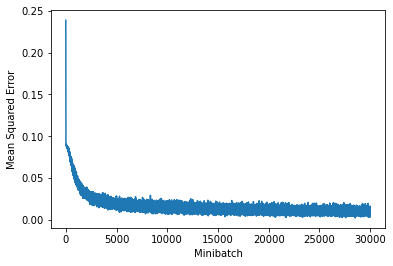

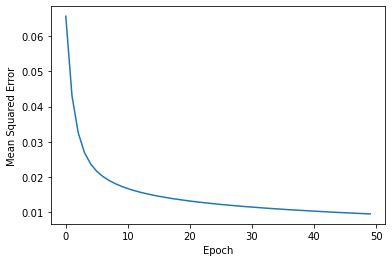

In [ ]:
plt.plot(range(len(minibatch_cost)), minibatch_cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Minibatch')
plt.show()

plt.plot(range(len(epoch_cost)), epoch_cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
def compute_accuracy(net, data_loader):
    correct_pred, num_examples = 0, 0
    with torch.no_grad():
        for features, targets in data_loader:
            features = features.view(-1, 28*28)
            _, outputs = net.forward(features)
            predicted_labels = torch.argmax(outputs, 1)
            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
        return correct_pred.float()/num_examples * 100
    
print('Training Accuracy: %.2f' % compute_accuracy(model, train_loader))
print('Test Accuracy: %.2f' % compute_accuracy(model, test_loader))

Training Accuracy: 94.69
Test Accuracy: 94.53


## Visual Inspection

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

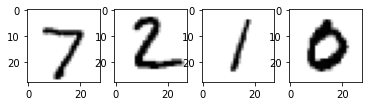

In [ ]:
for features, targets in test_loader:
    break
    
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(features[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
_, predictions = model.forward(features[:4].view(-1, 28*28))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions)

Predicted labels tensor([7, 2, 1, 0])


<h2 style='color:purple' align='center'> Section 3: Build our first neural network in Keras for handwritten digit recognition problem</h2>

**We will use keras digit MNIST dataset. This consist of 6000 28X28 pixel images and 1000 test images, these images are classified in one of the 10 categories (0-9)**

In [ ]:
# import the packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
# Load the data
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Lets get some idea about the data

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

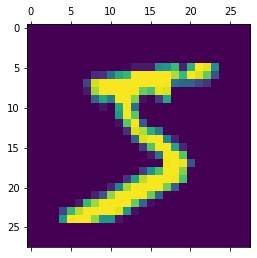

In [ ]:
# Visualizing our input data 
plt.matshow(X_train[0]) 

In [ ]:
y_train[0]

5

In [ ]:
# Data Scaling
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# Flatten the 28*28 grid data into a 1-dimensional data

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>A simple neural network </h3> It comprises of 784 (28*28) neurons in the input layer and 10 (0-9) neuron in the output layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4664 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3034 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2829 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2727 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9255


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.9229


[0.2729044556617737, 0.9229000210762024]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.9135108e-02, 3.4652666e-07, 6.1756968e-02, 9.7040540e-01,
       1.6750395e-03, 1.5693024e-01, 1.1980833e-06, 9.9987316e-01,
       1.0836333e-01, 7.1999025e-01], dtype=float32)

Lets check our test data and the corresponding prediction

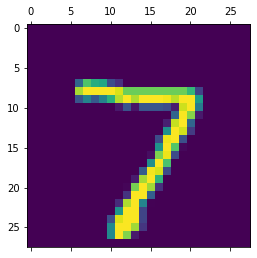

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted[0] # This gives the value obatined from each neuron of the output layer

array([2.9135108e-02, 3.4652666e-07, 6.1756968e-02, 9.7040540e-01,
       1.6750395e-03, 1.5693024e-01, 1.1980833e-06, 9.9987316e-01,
       1.0836333e-01, 7.1999025e-01], dtype=float32)

**np.argmax finds a maximum element  from an array and returns the index of it**

In [ ]:
np.argmax(y_predicted[0]) # This gives the index of the output layer where the maximum value occurs

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

We will visualize our results in the form of a confusion matrix

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    1,    0,    4,    8,    3,    2,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   6,   10,  916,   19,    7,    3,   13,   11,   43,    4],
       [   1,    0,   18,  928,    0,   19,    2,   12,   22,    8],
       [   1,    1,    2,    2,  915,    0,   12,    4,   10,   35],
       [   9,    3,    2,   41,   11,  752,   18,   10,   38,    8],
       [  10,    3,    6,    1,    7,    7,  918,    2,    4,    0],
       [   1,    6,   21,    7,    5,    0,    0,  960,    2,   26],
       [   6,   11,    6,   22,    9,   19,    9,   12,  874,    6],
       [  11,    7,    1,   10,   27,    4,    0,   28,    8,  913]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

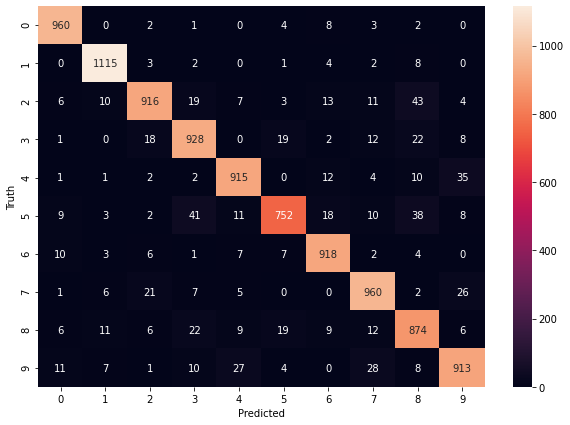

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer having 100 neurons</h3>

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2708 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1221 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0868 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0646 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9843


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0785 - accuracy: 0.9753


[0.07848526537418365, 0.9753000140190125]

Thus by adding a hidden layer the accuracy of the neural network has increased from 92.51% to 97.53%

Text(69.0, 0.5, 'Truth')

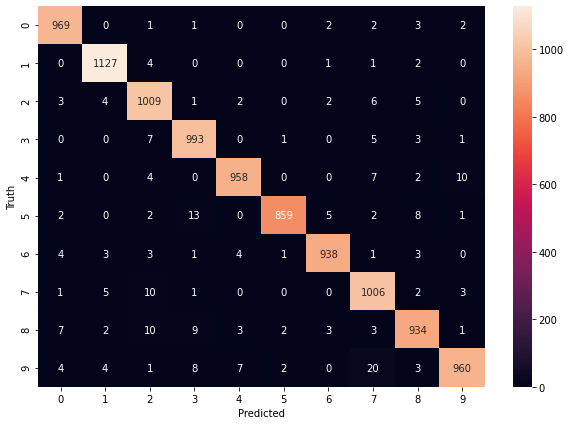

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2688 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1249 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9839


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0794 - accuracy: 0.9775


[0.07937731593847275, 0.9775000214576721]

Text(69.0, 0.5, 'Truth')

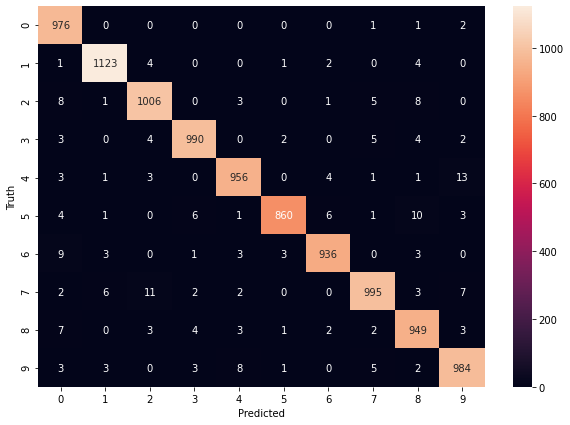

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h2 style='color:purple' align='center'>Build a neural network in Keras for image classification problem</h2>

**We will use keras fashion MNIST dataset. This consist of 60000 28X28 pixel images and 10000 test images, these images are classified in one of the 10 categories**

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot




In [ ]:
fm = tf.keras.datasets.fashion_mnist
(trainX, trainy), (testX, testy) = fm.load_data()

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [ ]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
trainy[0]

9

In [ ]:
from matplotlib import pyplot

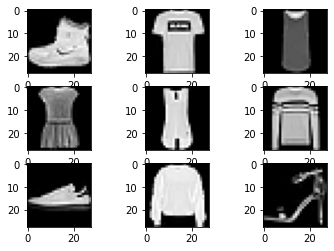

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

<h3 style='color:purple'>Now build the Sequential Model and add layers into it</h3>

In [ ]:
 from keras.models import Sequential
 from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.fit(trainX, trainy, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 18s 2ms/step - loss: 8.3581 - accuracy: 0.6603
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7492 - accuracy: 0.7479
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6453 - accuracy: 0.7660
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6187 - accuracy: 0.7823
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6128 - accuracy: 0.7858
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5865 - accuracy: 0.7924
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5388 - accuracy: 0.8152
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5417 - accuracy: 0.8172
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5203 - accuracy: 0.8244
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.52

In [ ]:
model.evaluate(testX, testy)

313/313 [==============================] - 1s 1ms/step - loss: 0.5724 - accuracy: 0.8132


[0.5723907947540283, 0.8131999969482422]

**Above shows accuracy score of 81.31%. The first parameter is loss**

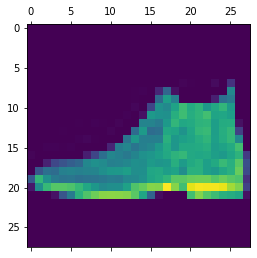

In [ ]:
plt.matshow(testX[0])

In [ ]:
yp = model.predict(testX)

In [ ]:
yp_labels = [np.argmax(i) for i in yp]

In [ ]:
np.argmax(yp[0])

9

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_labels[np.argmax(yp[0])]

'Ankle boot'

Text(69.0, 0.5, 'Truth')

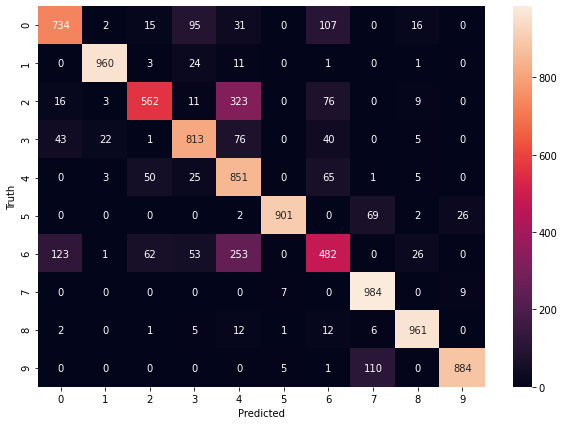

In [ ]:
cm = tf.math.confusion_matrix(labels=testy,predictions=yp_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Visualizing the Neural Netwrok Model

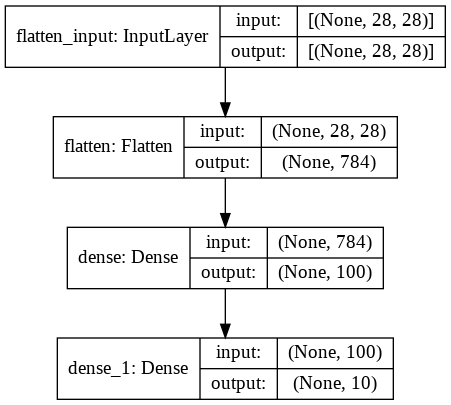

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)